In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import yfinance as yf
from datetime import datetime

# 1. Data collenction

In [3]:
now = datetime.now()

start = datetime(now.year-10,now.month,now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end, auto_adjust=False)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-09-21,25.890636,28.802500,28.842501,28.415001,28.417500,200888000
2015-09-22,25.483879,28.350000,28.545000,28.129999,28.344999,201384800
2015-09-23,25.690622,28.580000,28.680000,28.325001,28.407499,143026800
2015-09-24,25.843445,28.750000,28.875000,28.092501,28.312500,200878000
2015-09-25,25.778269,28.677500,29.172501,28.504999,29.110001,224607600
...,...,...,...,...,...,...
2025-09-15,236.699997,236.699997,238.190002,235.029999,237.000000,42699500
2025-09-16,238.149994,238.149994,241.220001,236.320007,237.179993,63421100


# 2.Data Visualization

In [4]:
df.shape

(2515, 6)

In [5]:
df.isna().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [6]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,107.548439,109.757078,110.852605,108.545521,109.651583,1.055501e+08
std,70.029914,69.639445,70.318676,68.873542,69.563404,5.932031e+07
min,20.624054,22.584999,22.917500,22.367500,22.500000,2.323470e+07
25%,40.382168,42.776251,43.196249,42.432501,42.805000,6.498540e+07
50%,111.872261,115.010002,116.120003,113.044998,114.830002,9.171760e+07
75%,168.480133,170.250000,171.985001,168.904999,170.224998,1.295468e+08
max,258.103729,259.019989,260.100006,257.630005,258.190002,5.334788e+08


In [7]:
df = df.reset_index()

In [8]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-09-21,25.890636,28.8025,28.842501,28.415001,28.417500,200888000
1,2015-09-22,25.483879,28.3500,28.545000,28.129999,28.344999,201384800
2,2015-09-23,25.690622,28.5800,28.680000,28.325001,28.407499,143026800
3,2015-09-24,25.843445,28.7500,28.875000,28.092501,28.312500,200878000
4,2015-09-25,25.778269,28.6775,29.172501,28.504999,29.110001,224607600


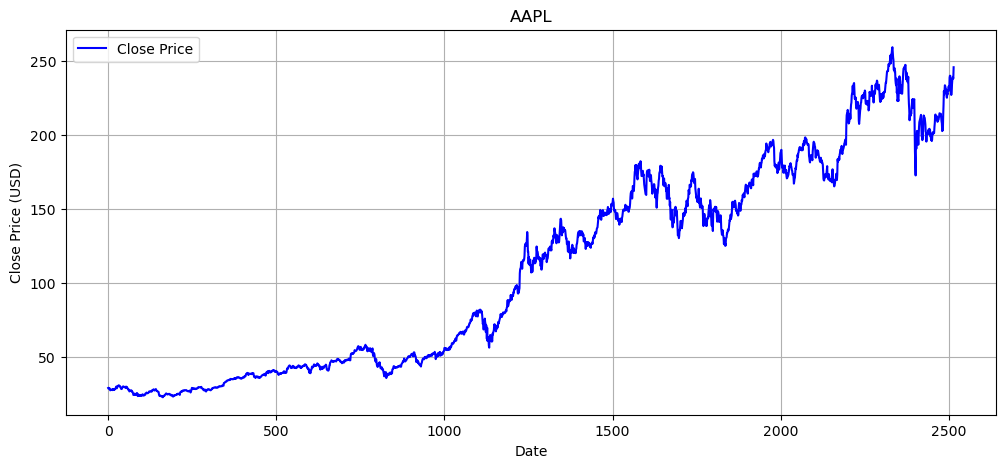

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title(ticker)
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


# 3.Feature engineering

In [10]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(105)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-09-21,25.890636,28.802500,28.842501,28.415001,28.417500,200888000,NaN
1,2015-09-22,25.483879,28.350000,28.545000,28.129999,28.344999,201384800,NaN
2,2015-09-23,25.690622,28.580000,28.680000,28.325001,28.407499,143026800,NaN
3,2015-09-24,25.843445,28.750000,28.875000,28.092501,28.312500,200878000,NaN
4,2015-09-25,25.778269,28.677500,29.172501,28.504999,29.110001,224607600,NaN
...,...,...,...,...,...,...,...,...
100,2016-02-12,21.327473,23.497499,23.625000,23.252501,23.547501,161405600,27.310950
101,2016-02-16,21.928789,24.160000,24.212500,23.652500,23.754999,196231600,27.269050
102,2016-02-17,22.264624,24.530001,24.552500,24.037500,24.167500,179452800,27.228550


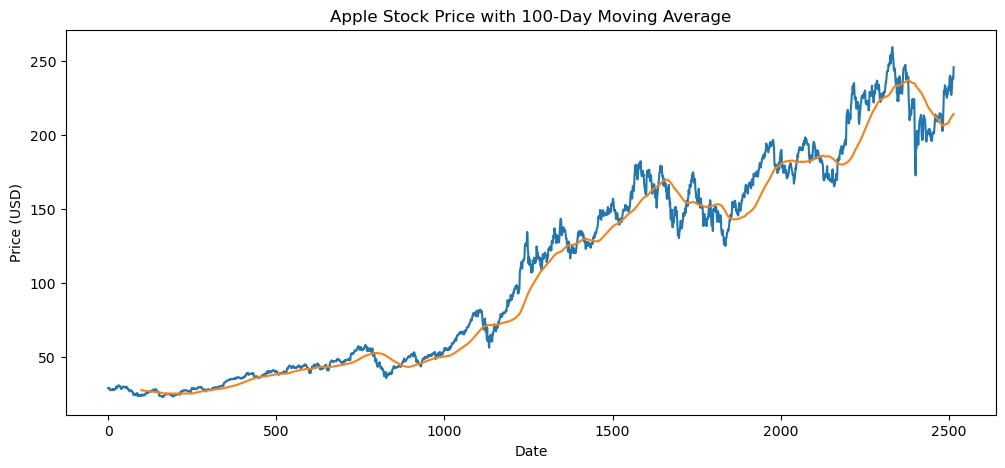

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_100'], label='100-Day MA')
plt.title('Apple Stock Price with 100-Day Moving Average')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [12]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-09-21,25.890636,28.802500,28.842501,28.415001,28.417500,200888000,NaN,NaN
1,2015-09-22,25.483879,28.350000,28.545000,28.129999,28.344999,201384800,NaN,NaN
2,2015-09-23,25.690622,28.580000,28.680000,28.325001,28.407499,143026800,NaN,NaN
3,2015-09-24,25.843445,28.750000,28.875000,28.092501,28.312500,200878000,NaN,NaN
4,2015-09-25,25.778269,28.677500,29.172501,28.504999,29.110001,224607600,NaN,NaN
...,...,...,...,...,...,...,...,...,...
198,2016-07-05,21.685610,23.747499,23.850000,23.615000,23.847500,110820800,24.998050,NaN
199,2016-07-06,21.808893,23.882500,23.915001,23.592501,23.650000,123796400,25.002625,26.183312
200,2016-07-07,21.902500,23.985001,24.125000,23.905001,23.924999,100558400,25.007500,26.159225


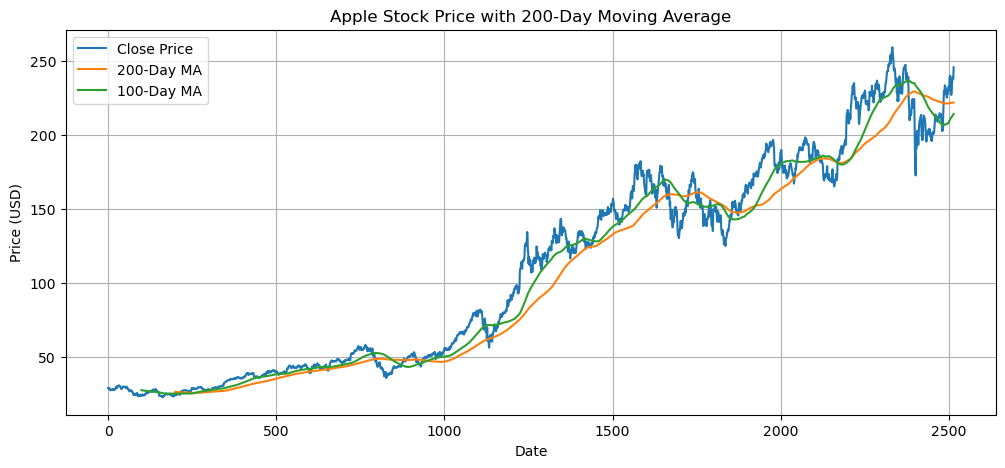

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_200'], label='200-Day MA',)
plt.plot(df['MA_100'], label='100-Day MA')

plt.title('Apple Stock Price with 200-Day Moving Average')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


### Calculating percentage  change in eac treading session

In [14]:
df['Percentage_Changed'] = df.Close.pct_change()
df[['Close', 'Percentage_Changed']]


Price,Close,Percentage_Changed
Ticker,AAPL,
0,28.802500,NaN
1,28.350000,-0.015710
2,28.580000,0.008113
3,28.750000,0.005948
4,28.677500,-0.002522
...,...,...
2510,236.699997,0.011236
2511,238.149994,0.006126
2512,238.990005,0.003527


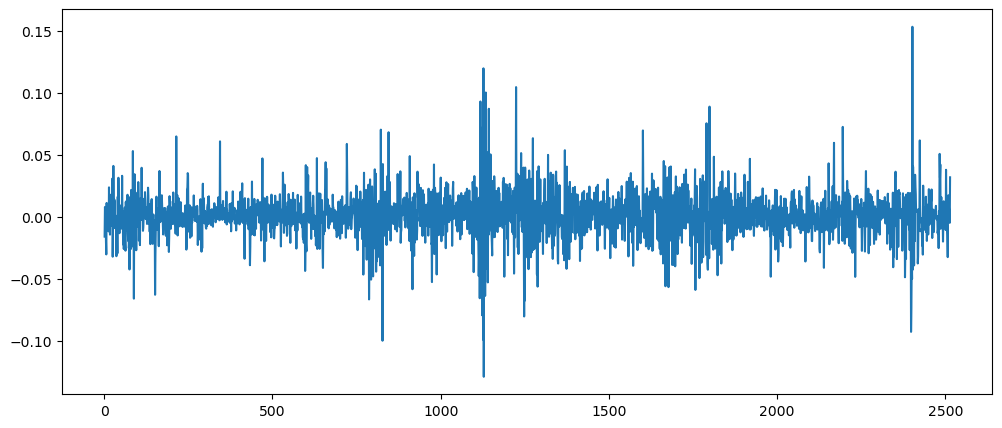

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage_Changed'])

In [16]:
df.shape

(2515, 10)

In [21]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])
print(data_training)
print(data_testing)

Ticker        AAPL
0        28.802500
1        28.350000
2        28.580000
3        28.750000
4        28.677500
...            ...
1755    157.369995
1756    163.429993
1757    153.839996
1758    155.309998
1759    152.369995

[1760 rows x 1 columns]
Ticker        AAPL
1760    150.699997
1761    154.479996
1762    156.899994
1763    153.720001
1764    152.740005
...            ...
2510    236.699997
2511    238.149994
2512    238.990005
2513    237.880005
2514    245.500000

[755 rows x 1 columns]


In [23]:
# scaling down dat a form 0 to 1 
from sklearn.preprocessing import MinMaxScaler
sacler = MinMaxScaler(feature_range=(0,1))

In [25]:
data_training_array = sacler.fit_transform(data_training)
data_training_array

array([[0.03899953],
       [0.03616121],
       [0.0376039 ],
       ...,
       [0.8233025 ],
       [0.83252314],
       [0.81408186]], shape=(1760, 1))

In [37]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]): 
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train , y_train = np.array(x_train) , np.array(y_train)
print(x_train.ndim)
print(y_train.ndim)

3
1


# 6. Model Building

In [38]:
from keras.models import Sequential
from keras.layers import Dense,LSTM , Input

In [40]:
model = Sequential()

model.add(Input(shape=(100, 1)))         
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64, activation='tanh'))
model.add(Dense(25))
model.add(Dense(1)) 

# 7. Model Training

In [42]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 0.0193
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 6.9970e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 5.9879e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 5.9291e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 5.9293e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 5.4578e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 5.3690e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 5.5441e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 4.7450e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 4.7494e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.4348e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 5.2106e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.9727e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.5161e-04
Epoch 15/50
52/52 ━

model.summary()

In [45]:
model.save('stock_prediction_model.keras')

# 8.prepering Test Data

In [87]:
past_100_days = data_training.tail(100)

In [88]:
fianl_df = pd.concat([past_100_days, data_testing],ignore_index=True)

In [89]:
fianl_df

Ticker,AAPL
0,162.880005
1,156.800003
2,156.570007
3,163.639999
4,157.649994
...,...
850,236.699997
851,238.149994
852,238.990005
853,237.880005


In [90]:
input_data = sacler.fit_transform(fianl_df)
input_data.shape

(855, 1)

In [91]:
x_test = []
y_test = []
for i in range(100,data_training_array.shape[0]): 
    x_test.append(data_training_array[i-100:i])
    y_test.append(data_training_array[i,0])

In [92]:
x_test,y_test = np.array(x_test),np.array(y_test)

# 9. Making Prediction

In [93]:
y_predected = model.predict(x_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


In [94]:
y_predected

array([[0.00269834],
       [0.00227315],
       [0.00293717],
       ...,
       [0.87717175],
       [0.8571881 ],
       [0.8444857 ]], shape=(1660, 1), dtype=float32)

In [95]:
y_predected = sacler.inverse_transform(y_predected.reshape(-1,1)).flatten()
y_test = sacler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [96]:
print(y_predected)

[125.38157  125.3246   125.413574 ... 242.561    239.8832   238.18108 ]


In [97]:
print(y_test)

[125.78697201 126.34381723 126.65481055 ... 235.34252533 236.57809163
 234.10695902]


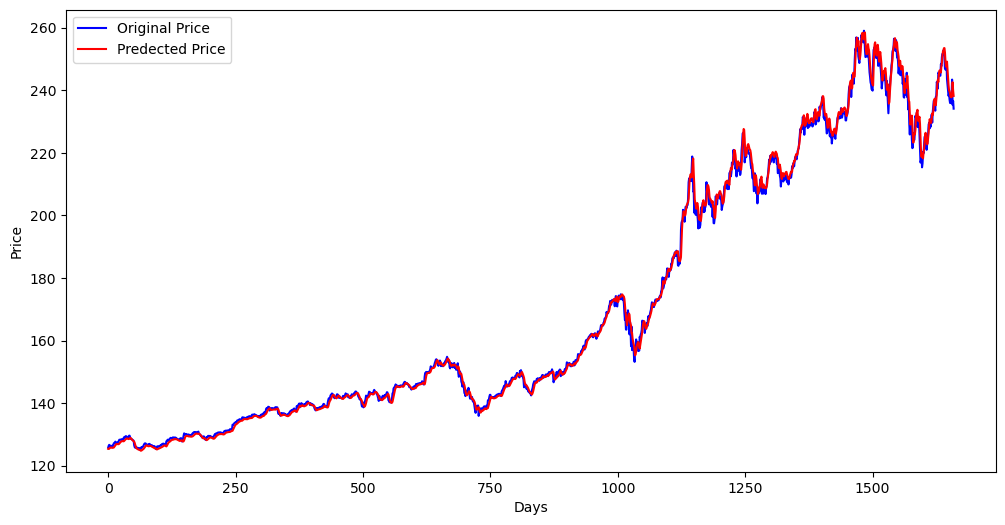

In [98]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predected,'r', label='Predected Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

# 10. Model Evaluation

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_predected)
mae = mean_absolute_error(y_test, y_predected)
r2 = r2_score(y_test, y_predected)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Squared Error: 3.234851258232554
Mean Absolute Error: 1.200751413442567
R² Score: 0.9980457187178928
